<a href="https://colab.research.google.com/github/QuangTrungNguyen/Bitcoin-predictions-and-visualisations-capstone/blob/master/Multilayer_Neural_Network_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




In [3]:
# Test if GPU is active
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

##Import Libraries##

In [4]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from time import time
from random import randint
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Dropout,Activation
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras import initializers
from matplotlib import pyplot
from datetime import datetime
import sklearn.model_selection
import plotly.offline as py
import plotly.graph_objs as go
import keras
from sklearn.pipeline import Pipeline
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

py.init_notebook_mode(connected=True)
%matplotlib inline


Using TensorFlow backend.


##Import Dataset##

In [5]:
# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# PyDrive reference:
# https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html

# Read data
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Read the dataset and record the running time
time_1 = time()
dataset = pd.read_csv("BTC_15min.csv", sep = ",", parse_dates=[0], dayfirst = True)
time_2 = time()
print('read data cost '+ str(time_2 - time_1)+' second')

random.seed(42)

X = dataset.iloc[:, 1:-1]
y = dataset.iloc[:, -1]



Saving BTC_15min.csv to BTC_15min (1).csv
User uploaded file "BTC_15min.csv" with length 4683361 bytes
read data cost 0.09671425819396973 second


## Model Training and Testing##

Train on 9463 samples, validate on 4661 samples
Epoch 1/500
9463/9463 [==============================] - 0s 52us/step - loss: 0.6931 - acc: 0.5076 - val_loss: 0.6931 - val_acc: 0.5113
Epoch 2/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6930 - acc: 0.5114 - val_loss: 0.6930 - val_acc: 0.5113
Epoch 3/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6930 - acc: 0.5114 - val_loss: 0.6929 - val_acc: 0.5113
Epoch 4/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6928 - acc: 0.5114 - val_loss: 0.6927 - val_acc: 0.5113
Epoch 5/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6925 - acc: 0.5114 - val_loss: 0.6921 - val_acc: 0.5113
Epoch 6/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6914 - acc: 0.5116 - val_loss: 0.6901 - val_acc: 0.5128
Epoch 7/500
9463/9463 [==============================] - 0s 10us/step - loss: 0.6880 - acc: 0.5499 - val_loss: 0.6841 - val_acc: 0.6121


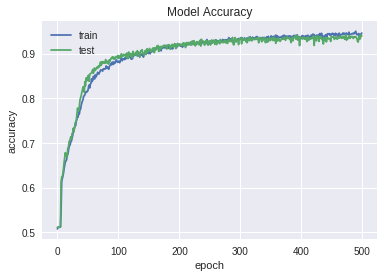

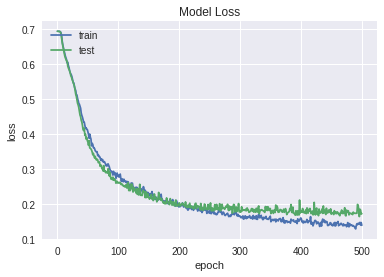

Test Accuracy: 0.94


In [9]:

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=(1))

# Standardise data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Perform Principal Component Analysis 
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
explained_variace=pca.explained_variance_ratio_
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout

# Train classifier
classifier = Sequential()
classifier.add(Dense(units = 128,kernel_initializer='normal', activation = 'relu', input_dim = X_train.shape[1]))
classifier.add(Dropout(0.25))
classifier.add(Dense(units = 64, kernel_initializer='normal',activation = 'relu'))
classifier.add(Dense(units = 32, kernel_initializer='normal',activation = 'relu'))
classifier.add(Dense(units = 16, kernel_initializer='normal',activation = 'relu'))
classifier.add(Dense(units = 8, kernel_initializer='normal',activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer='normal',activation = 'sigmoid'))
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 1000, epochs = 500)

# Prediction
y_pred = classifier.predict(X_test)
y_pred=np.where(y_pred>0.5,1,0)

# Confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)


# Plot history for accuracy

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Plot history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Test Accuracy: {:0.2f}".format(accuracy))

